# Metabarcoding

In [2]:
# Libraries
library(tidyverse)
library(ROBITools)
library(reshape2)
library(vegan)
library(ggalt)
library(ggpubr)
library(ggrepel)

In [ ]:
# Data
metabar_taxa  <- read.delim("GenomeDK_Metabar/classified.txt")
metabar_count <- read.delim("GenomeDK_Metabar/DADA2_nochim.table")

In [ ]:
# Select controls
m_cne <- grepl("CNE", names(metabar_count))
m_cne[1] <- TRUE
m_ntc <- grepl("NTC", names(metabar_count))
m_ntc[1] <- TRUE

cne <- metabar_count[,m_cne]
ntc <- metabar_count[,m_ntc]

# Find contaminants
cne_cont <- cne %>% mutate(total = rowSums(cne[,-1])) %>% filter(total > 0)
ntc_cont <- ntc %>% mutate(total = rowSums(ntc[,-1])) %>% filter(total > 0)

In [ ]:
# Select contaminant sequences
cont <- unique(c(cne_cont$id, ntc_cont$id))

# Remove contaminants and filter
metabarcoding <- metabar_taxa %>% filter(!qseqid %in% cont) %>% filter(pident.max.best > 90)

# Select contaminants
contaminants <- metabar_taxa %>% filter(qseqid %in% cont)

# Metabarcoding diversity
tx <- metabarcoding[,c(8:14)]
dk <- length(unique(tx$kingdom[!is.na(tx$kingdom)]))
dp <- length(unique(tx$phylum[!is.na(tx$phylum)]))
dc <- length(unique(tx$class[!is.na(tx$class)]))
do <- length(unique(tx$order[!is.na(tx$order)]))
df <- length(unique(tx$family[!is.na(tx$family)]))
dg <- length(unique(tx$genus[!is.na(tx$genus)]))
ds <- length(unique(tx$species[!is.na(tx$species)]))

message(paste("Metabarcoding diversity: kingdom: ", dk, ", phylum: ", dp,
              ", class: ", dc, ", order: ", do, ", family: ", df, ", genus: ", dg, " and species: ", ds, sep=""))

In [ ]:
# Remove contaminant from counts
metabar_count_clean <- metabar_count %>% filter(!id %in% cont)
metabar_count_clean <- metabar_count_clean[,!grepl("NTC", names(metabar_count_clean))]
metabar_count_clean <- metabar_count_clean[,!grepl("CNE", names(metabar_count_clean))]

In [ ]:
# Rename columns
cols <- colnames(metabar_count_clean)

clean_cols <- str_replace(str_replace(cols[-1], "sample.", ""),"u","")
clean_cols <- str_replace(clean_cols, "GP1", "EN0.2A")
clean_cols <- str_replace(clean_cols, "GP2", "EN0.2B")
clean_cols <- str_replace(clean_cols, "GP3", "EN0.2C")
clean_cols <- str_replace(clean_cols, "1_0.2", "OP0.2A")
clean_cols <- str_replace(clean_cols, "2_0.2", "OP0.2B")
clean_cols <- str_replace(clean_cols, "3_0.2", "OP0.2C")
clean_cols <- str_replace(clean_cols, "1_1.2", "OP1.2A")
clean_cols <- str_replace(clean_cols, "2_1.2", "OP1.2B")
clean_cols <- str_replace(clean_cols, "3_1.2", "OP1.2C")
clean_cols <- str_replace(clean_cols, "1_5.0", "OP5.0A")
clean_cols <- str_replace(clean_cols, "2_5.0", "OP5.0B")
clean_cols <- str_replace(clean_cols, "3_5.0", "OP5.0C")
clean_cols <- str_replace(clean_cols, "1_8.0", "OP8.0A")
clean_cols <- str_replace(clean_cols, "2_8.0", "OP8.0B")
clean_cols <- str_replace(clean_cols, "3_8.0", "OP8.0C")

colnames(metabar_count_clean)[-1] <-  clean_cols
cols <- colnames(metabar_count_clean)

### Raw rarefaction curves

In [ ]:
# GP
gp1 <- cols[grepl("EN0.2A", cols)]
gp2 <- cols[grepl("EN0.2B", cols)]
gp3 <- cols[grepl("EN0.2C", cols)]
# A02
a02 <- cols[grepl("OP0.2A", cols)]
b02 <- cols[grepl("OP0.2B", cols)]
c02 <- cols[grepl("OP0.2C", cols)]
# A02
a12 <- cols[grepl("OP1.2A", cols)]
b12 <- cols[grepl("OP1.2B", cols)]
c12 <- cols[grepl("OP1.2C", cols)]
# A02
a50 <- cols[grepl("OP5.0A", cols)]
b50 <- cols[grepl("OP5.0B", cols)]
c50 <- cols[grepl("OP5.0C", cols)]
# A02
a80 <- cols[grepl("OP8.0A", cols)]
b80 <- cols[grepl("OP8.0B", cols)]
c80 <- cols[grepl("OP8.0C", cols)]

In [ ]:
# Colors
colors <- c("#F8766D", "#B79F00", "#00BF7D", "#00B0F6", "#E76BF3")

In [ ]:
# Raw curve
cc <- t(metabar_count_clean)
colnames(cc) <- cc[1,]
cc <- cc[-1,]
cc <- apply(cc, 2, as.numeric)
rownames(cc) <- colnames(metabar_count_clean)[-1]

In [ ]:
# Example
cc[gp1,]

In [ ]:
# GP (EN)
raremax <- min(rowSums(cc[gp1,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.GP1.png", width=2000, height=2000, res=300)
rarecurve(cc[gp1,], step = 20, sample = raremax, col = colors[1], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[gp2,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.GP2.png", width=2000, height=2000, res=300)
rarecurve(cc[gp2,], step = 20, sample = raremax, col = colors[1], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[gp3,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.GP3.png", width=2000, height=2000, res=300)
rarecurve(cc[gp3,], step = 20, sample = raremax, col = colors[1], cex = 0.6)
dev.off()

In [ ]:
# 0.2
raremax <- min(rowSums(cc[a02,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.A02.png", width=2000, height=2000, res=300)
rarecurve(cc[a02,], step = 20, sample = raremax, col = colors[2], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[b02,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.B02.png", width=2000, height=2000, res=300)
rarecurve(cc[b02,], step = 20, sample = raremax, col = colors[2], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[c02,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.C02.png", width=2000, height=2000, res=300)
rarecurve(cc[c02,], step = 20, sample = raremax, col = colors[2], cex = 0.6)
dev.off()

In [ ]:
# 1.2
raremax <- min(rowSums(cc[a12,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.A12.png", width=2000, height=2000, res=300)
rarecurve(cc[a12,], step = 20, sample = raremax, col = colors[3], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[b12,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.B12.png", width=2000, height=2000, res=300)
rarecurve(cc[b12,], step = 20, sample = raremax, col = colors[3], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[c12,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.C12.png", width=2000, height=2000, res=300)
rarecurve(cc[c12,], step = 20, sample = raremax, col = colors[3], cex = 0.6)
dev.off()

In [ ]:
# 5.0
raremax <- min(rowSums(cc[a50,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.A50.png", width=2000, height=2000, res=300)
rarecurve(cc[a50,], step = 20, sample = raremax, col = colors[4], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[b50,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.B50.png", width=2000, height=2000, res=300)
rarecurve(cc[b50,], step = 20, sample = raremax, col = colors[4], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[c50,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.C50.png", width=2000, height=2000, res=300)
rarecurve(cc[c50,], step = 20, sample = raremax, col = colors[4], cex = 0.6)
dev.off()

In [ ]:
# 8.0
raremax <- min(rowSums(cc[a80,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.A80.png", width=2000, height=2000, res=300)
rarecurve(cc[a80,], step = 20, sample = raremax, col = colors[5], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[b80,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.B80.png", width=2000, height=2000, res=300)
rarecurve(cc[b80,], step = 20, sample = raremax, col = colors[5], cex = 0.6)
dev.off()

raremax <- min(rowSums(cc[c80,]))
png("GenomeDK_Metabar/raw_curves/raw_curve.replicates.C80.png", width=2000, height=2000, res=300)
rarecurve(cc[c80,], step = 20, sample = raremax, col = colors[5], cex = 0.6)
dev.off()

### Raw accumulation plots

In [ ]:
# GP1
accum <- specaccum(cc[gp1,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[gp1,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.GP1.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[1], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="EN0.2A")
boxplot(accum2, col=colors[1], add=TRUE, pch="+")
dev.off()

# GP2
accum <- specaccum(cc[gp2,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[gp2,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.GP2.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[1], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="EN0.2B")
boxplot(accum2, col=colors[1], add=TRUE, pch="+")
dev.off()

# GP3
accum <- specaccum(cc[gp3,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[gp3,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.GP3.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[1], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="EN0.2C")
boxplot(accum2, col=colors[1], add=TRUE, pch="+")
dev.off()

In [ ]:
# A02
accum <- specaccum(cc[a02,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[a02,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.A02.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[2], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP0.2A")
boxplot(accum2, col=colors[2], add=TRUE, pch="+")
dev.off()

# B02
accum <- specaccum(cc[b02,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[b02,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.B02.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[2], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP0.2B")
boxplot(accum2, col=colors[2], add=TRUE, pch="+")
dev.off()

# C02
accum <- specaccum(cc[c02,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[c02,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.C02.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[2], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP0.2C")
boxplot(accum2, col=colors[2], add=TRUE, pch="+")
dev.off()

In [ ]:
# A12
accum <- specaccum(cc[a12,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[a12,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.A12.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[3], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP1.2A")
boxplot(accum2, col=colors[3], add=TRUE, pch="+")
dev.off()

# B12
accum <- specaccum(cc[b12,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[b12,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.B12.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[3], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP1.2B")
boxplot(accum2, col=colors[3], add=TRUE, pch="+")
dev.off()

# C12
accum <- specaccum(cc[c12,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[c12,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.C12.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[3], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP1.2C")
boxplot(accum2, col=colors[3], add=TRUE, pch="+")
dev.off()

In [ ]:
# A50
accum <- specaccum(cc[a50,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[a50,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.A12.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[4], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP5.0A")
boxplot(accum2, col=colors[4], add=TRUE, pch="+")
dev.off()

# B50
accum <- specaccum(cc[b50,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[b50,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.B50.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[4], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP5.0B")
boxplot(accum2, col=colors[4], add=TRUE, pch="+")
dev.off()

# C50
accum <- specaccum(cc[c50,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[c50,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.C50.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[4], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP5.0C")
boxplot(accum2, col=colors[4], add=TRUE, pch="+")
dev.off()

In [ ]:
# A80
accum <- specaccum(cc[a80,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[a80,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.A80.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[5], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP8.0A")
boxplot(accum2, col=colors[5], add=TRUE, pch="+")
dev.off()

# B80
accum <- specaccum(cc[b80,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[b80,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.B80.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[5], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP8.0B")
boxplot(accum2, col=colors[5], add=TRUE, pch="+")
dev.off()

# C80
accum <- specaccum(cc[c80,], method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc[c80,], "random")
png("GenomeDK_Metabar/raw_curves/accum_curve.replicates.C80.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col=colors[5], lwd=2, ci.lty=0, ci.col="gray",xlab="No. of sites",ylab="No. of taxa",main="OP8.0C")
boxplot(accum2, col=colors[5], add=TRUE, pch="+")
dev.off()

In [ ]:
# All (Raw)
accum <- specaccum(cc, method = "exact", permutations = 100, conditioned =TRUE, gamma = "jack1", w = NULL)
accum2 <- specaccum(cc, "random")
png("GenomeDK_Metabar/accum_curve.raw.png", width=2000, height=2000, res=300)
plot(accum, ci.type="poly", col="black", lwd=2, ci.lty=0, ci.col="gold",xlab="No. of sites",ylab="No. of taxa",main="")
boxplot(accum2, col="gray", add=TRUE, pch="+")
dev.off()

### Rarefaction transformed curves

In [4]:
cs2mr <- metabar_count_clean
colnames(cs2mr)[-1] <- paste("sample:", colnames(cs2mr)[-1], sep="")
f = 'GenomeDK_Metabar/temporal/all_for_rep_rarefy.txt'
write.table(cs2mr, file=f, quote=FALSE, sep='\t', col.names = NA, row.names=TRUE)

In [5]:
dfimp <- import.metabarcoding.data(f)
df_mod <- dfimp$samples %>% mutate(replicate =  dfimp$samples$sample) %>% mutate(sample = gsub("_[0-9]", "", dfimp$samples$sample))
dfimp@samples = df_mod

In [6]:
# Rarefy metabarcoding
median = median(rowSums(dfimp$reads[dfimp$samples$replicate,]))
raw.rarefy = ROBITools::rarefy(dfimp, n=median, MARGIN='sample')
tmp = ROBITools:::aggregate.metabarcoding.data(raw.rarefy, by=list(sample=raw.rarefy$samples$sample), FUN=sum)
minimum = min(rowSums(tmp$reads[tmp$samples$sample,]))
final.rarefy = ROBITools::rarefy(tmp, n=minimum, MARGIN = 'sample')

**Rarefaction effect**

In [ ]:
# Boxplot: raw metabarcoding counts
col <- c(rep("#F8766D",12), rep("#B79F00",12), rep("#00BF7D",12), rep("#00B0F6",12), rep("#E76BF3",12))
reads <- as.data.frame(dfimp$reads)
reads$id <- rownames(reads)
p <- melt(reads, id.vars = "id") %>% ggplot() + geom_boxplot(aes(x=id, y=log(value)), color=col) +
labs(x="Samples", y="Log(Counts)") +
theme_bw() %+replace% theme(axis.text.x = element_text(angle = 90, size=14),
                                 axis.text.y = element_text(size=18),
                                 axis.title = element_text(size=20),
                                 legend.title = element_text(size=18, face="bold"),
                                 legend.text = element_text(size=16))

png(file="GenomeDK_Metabar/boxplot.raw.png", width=3200, height=2000, res=300)
p
dev.off()

In [ ]:
# Boxplot: median rarefy metabarcoding counts
col <- c(rep("#F8766D",12), rep("#B79F00",12), rep("#00BF7D",12), rep("#00B0F6",12), rep("#E76BF3",12))
reads <- as.data.frame(raw.rarefy$reads)
reads$id <- rownames(reads)
p <- melt(reads, id.vars = "id") %>% ggplot() + geom_boxplot(aes(x=id, y=log(value)), color=col) +
labs(x="Samples", y="Log(Counts)") +
theme_bw() %+replace% theme(axis.text.x = element_text(angle = 90, size=14),
                                 axis.text.y = element_text(size=18),
                                 axis.title = element_text(size=20),
                                 legend.title = element_text(size=18, face="bold"),
                                 legend.text = element_text(size=16))

png(file="GenomeDK_Metabar/boxplot.median_rarefy.png", width=3200, height=2000, res=300)
p
dev.off()

In [ ]:
# Boxplot: minimum rarefy metabarcoding counts
col <- c(rep("#F8766D",3), rep("#B79F00",3), rep("#00BF7D",3), rep("#00B0F6",3), rep("#E76BF3",3))
reads <- as.data.frame(final.rarefy$reads)
reads$id <- rownames(reads)
p <- melt(reads, id.vars = "id") %>% ggplot() + geom_boxplot(aes(x=id, y=log(value)), color=col) +
labs(x="Samples", y="Log(Counts)") +
theme_bw() %+replace% theme(axis.text.x = element_text(angle = 90, size=14),
                                 axis.text.y = element_text(size=18),
                                 axis.title = element_text(size=20),
                                 legend.title = element_text(size=18, face="bold"),
                                 legend.text = element_text(size=16))

png(file="GenomeDK_Metabar/boxplot.minimum_rarefy.png", width=2300, height=2000, res=300)
p
dev.off()

**nMDS**

In [35]:
# Relative Abundance PCA (nMDS) - Mads!

nMDS_plot <- function(reads, samples) {
  # Create scores
  nmds = metaMDS(reads, distance = "bray")
  nmds.sites.scores = as.data.frame(vegan::scores(nmds)$sites)
  #nmds.species.scores = as.data.frame(vegan::scores(nmds)$species)

  # Add metadata
  nmds.sites.scores$sample = samples$sample
  nmds.sites.scores$pore = samples$pore

  # Factorize
  nmds.sites.scores <- nmds.sites.scores %>%
    dplyr::mutate(pore=factor(pore, levels=c("EN0.2", "OP0.2", "OP1.2","OP5.0", "OP8.0")))

  # Plot
  p <- ggplot(nmds.sites.scores, aes(x = NMDS1, y = NMDS2, label=sample)) + 
    geom_point(size = 5, aes(colour = pore)) +
    geom_encircle(aes(fill = pore), s_shape = 1, expand = 0,
                  alpha = 0.2, color = "black", show.legend = FALSE) +
    geom_text_repel(size=4) +
    labs(colour='Filter type') +
    theme_classic() %+replace% theme(axis.text.x = element_text(size=14),
                                 axis.text.y = element_text(size=14),
                                 axis.title = element_text(size=20),
                                 legend.title = element_text(size=18, face="bold"),
                                 legend.text = element_text(size=16))
  
  return(p)
}

In [38]:
## nMDS plot (after rarefaction)
samples <- dfimp@samples
samples <- samples %>% mutate(pore = ifelse(sample %in% c("OP0.2A","OP0.2B","OP0.2C"), "OP0.2",
                                            ifelse(sample %in% c("OP1.2A","OP1.2B","OP1.2C"), "OP1.2",
                                            ifelse(sample %in% c("OP5.0A","OP5.0B","OP5.0C"), "OP5.0",
                                            ifelse(sample %in% c("OP8.0A","OP8.0B","OP8.0C"), "OP8.0", "EN0.2")))))
reads <- dfimp@reads

In [39]:
p <- nMDS_plot(reads, samples)

png(file="GenomeDK_Metabar/nMDS.metabar.rarefied.png", width=2300, height=2000, res=300)
p
dev.off()

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1109387 
Run 1 stress 0.1109387 
... New best solution
... Procrustes: rmse 3.518535e-05  max resid 0.0001917895 
... Similar to previous best
Run 2 stress 0.1125906 
Run 3 stress 0.1425476 
Run 4 stress 0.1109387 
... Procrustes: rmse 1.59646e-05  max resid 8.606181e-05 
... Similar to previous best
Run 5 stress 0.1125487 
Run 6 stress 0.1812953 
Run 7 stress 0.1487766 
Run 8 stress 0.1122519 
Run 9 stress 0.1516041 
Run 10 stress 0.1125487 
Run 11 stress 0.1655325 
Run 12 stress 0.1125487 
Run 13 stress 0.1646894 
Run 14 stress 0.1125487 
Run 15 stress 0.1493049 
Run 16 stress 0.1486385 
Run 17 stress 0.1615279 
Run 18 stress 0.1125487 
Run 19 stress 0.1109387 
... New best solution
... Procrustes: rmse 9.818398e-06  max resid 5.507376e-05 
... Similar to previous best
Run 20 stress 0.1425475 
*** Best solution repeated 1 times


Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


png 
  2

Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


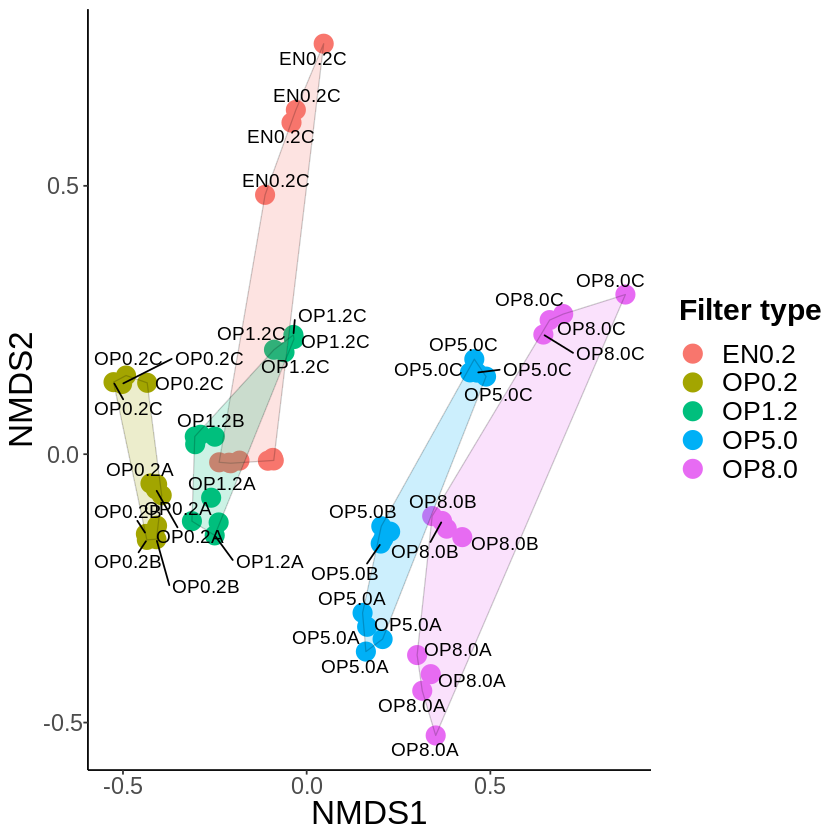

In [40]:
p

In [41]:
## nMDS collapsed (after rarefaction)
# Reads
dfm <- merge(melt(reads), samples, by.x="Var1", by.y="replicate")
dfm <- dfm %>% group_by(sample, Var2) %>% summarise(mean_value = mean(value))
dfm <- dfm %>% pivot_wider(names_from = Var2, values_from = mean_value)
rownames(dfm) <- dfm$samples
dfm <- dfm[,-1]

# Samples
samples_collapsed <- samples %>% select(sample, pore) %>% unique()
rownames(samples_collapsed) <- samples_collapsed$sample

`summarise()` has grouped output by 'sample'. You can override using the `.groups`
argument.
Warning message:
“Unknown or uninitialised column: `samples`.”


In [42]:
dim(dfm)
dim(samples_collapsed)

[1]    15 16205

[1] 15  2

Square root transformation
Wisconsin double standardization
Run 0 stress 0.09794786 
Run 1 stress 0.1092395 
Run 2 stress 0.1010216 
Run 3 stress 0.1491239 
Run 4 stress 0.09794786 
... Procrustes: rmse 7.353081e-06  max resid 1.489959e-05 
... Similar to previous best
Run 5 stress 0.1010215 
Run 6 stress 0.1010217 
Run 7 stress 0.09794785 
... New best solution
... Procrustes: rmse 4.93878e-05  max resid 0.0001432823 
... Similar to previous best
Run 8 stress 0.1010216 
Run 9 stress 0.09794788 
... Procrustes: rmse 8.370911e-05  max resid 0.0002417303 
... Similar to previous best
Run 10 stress 0.2024732 
Run 11 stress 0.09794787 
... Procrustes: rmse 2.458449e-05  max resid 5.366739e-05 
... Similar to previous best
Run 12 stress 0.101022 
Run 13 stress 0.09794786 
... Procrustes: rmse 2.579332e-05  max resid 7.377289e-05 
... Similar to previous best
Run 14 stress 0.1010216 
Run 15 stress 0.1092394 
Run 16 stress 0.1092395 
Run 17 stress 0.1010214 
Run 18 stress 0.1491239 
Run 19 st

png 
  2

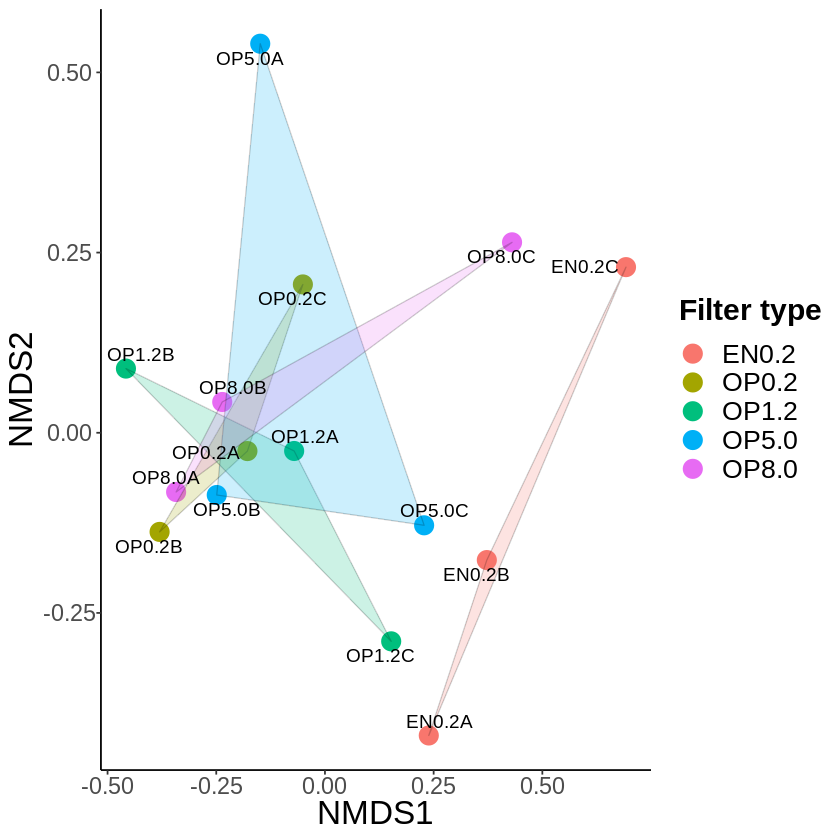

In [43]:
p <- nMDS_plot(dfm, samples_collapsed)

png(file="GenomeDK_Metabar/nMDS.metabar.collapsed.rarefied.png", width=2300, height=2000, res=300)
p
dev.off()

p

**Curves**

In [ ]:
# GP1
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.GP1.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[gp1,], step = 20, col = colors[1], cex = 0.6, ylab="No. of taxa")
dev.off()

# GP2
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.GP2.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[gp2,], step = 20, col = colors[1], cex = 0.6, ylab="No. of taxa")
dev.off()

# GP3
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.GP3.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[gp3,], step = 20, col = colors[1], cex = 0.6, ylab="No. of taxa")
dev.off()

In [ ]:
# A02
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.A02.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[a02,], step = 20, col = colors[2], cex = 0.6, ylab="No. of taxa")
dev.off()

# B02
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.B02.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[b02,], step = 20, col = colors[2], cex = 0.6, ylab="No. of taxa")
dev.off()

# C02
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.C02.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[c02,], step = 20, col = colors[2], cex = 0.6, ylab="No. of taxa")
dev.off()

In [ ]:
# A12
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.A12.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[a12,], step = 20, col = colors[3], cex = 0.6, ylab="No. of taxa")
dev.off()

# B12
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.B12.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[b12,], step = 20, col = colors[3], cex = 0.6, ylab="No. of taxa")
dev.off()

# C12
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.C12.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[c12,], step = 20, col = colors[3], cex = 0.6, ylab="No. of taxa")
dev.off()

In [ ]:
# A50
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.A50.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[a50,], step = 20, col = colors[4], cex = 0.6, ylab="No. of taxa")
dev.off()

# B50
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.B50.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[b50,], step = 20, col = colors[4], cex = 0.6, ylab="No. of taxa")
dev.off()

# C50
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.C50.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[c50,], step = 20, col = colors[4], cex = 0.6, ylab="No. of taxa")
dev.off()

In [ ]:
# A80
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.A80.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[a80,], step = 20, col = colors[5], cex = 0.6, ylab="No. of taxa")
dev.off()

# B80
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.B80.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[b80,], step = 20, col = colors[5], cex = 0.6, ylab="No. of taxa")
dev.off()

# C80
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.replicates.C80.png", width=2000, height=2000, res=300)
rarecurve(raw.rarefy@reads[c80,], step = 20, col = colors[5], cex = 0.6, ylab="No. of taxa")
dev.off()

In [ ]:
# All samples
col <- c(rep("#F8766D",3), rep("#B79F00",3), rep("#00BF7D",3), rep("#00B0F6",3), rep("#E76BF3",3))
png("GenomeDK_Metabar/rarefied_curves/rarefied_curve.all.png", width=2000, height=2000, res=300)
rarecurve(final.rarefy@reads, step = 20, col = col , cex = 0.6, ylab="No. of taxa")
dev.off()